### LSTM Example in Deep Learning with Python
#### Chapter 6 pg. 205
##### Dataset: IMDB Dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features= 10000
maxlen= 500
batch_size= 32

(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train= sequence.pad_sequences(input_train, maxlen=maxlen)
input_test= sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

model= Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics=['acc'])
history= model.fit(input_train, y_train, epochs= 10, batch_size= 128, validation_split= 0.2)


Epoch 1/10
157/157 [==============================] - 36s 219ms/step - loss: 0.5124 - acc: 0.7542 - val_loss: 0.4030 - val_acc: 0.8386
Epoch 2/10
157/157 [==============================] - 32s 205ms/step - loss: 0.2943 - acc: 0.8849 - val_loss: 0.8201 - val_acc: 0.7074
Epoch 3/10
157/157 [==============================] - 34s 218ms/step - loss: 0.2378 - acc: 0.9101 - val_loss: 0.3469 - val_acc: 0.8534
Epoch 4/10
157/157 [==============================] - 34s 216ms/step - loss: 0.1972 - acc: 0.9291 - val_loss: 0.2782 - val_acc: 0.8932
Epoch 5/10
157/157 [==============================] - 33s 210ms/step - loss: 0.1768 - acc: 0.9355 - val_loss: 0.3799 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 32s 204ms/step - loss: 0.1576 - acc: 0.9431 - val_loss: 0.2990 - val_acc: 0.8778
Epoch 7/10
157/157 [==============================] - 33s 209ms/step - loss: 0.1424 - acc: 0.9487 - val_loss: 0.3445 - val_acc: 0.8872
Epoch 8/10
157/157 [==============================] - 3

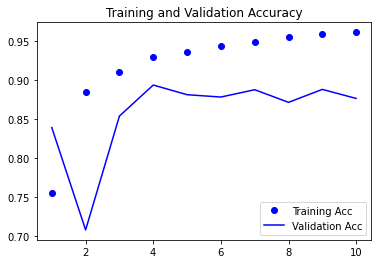

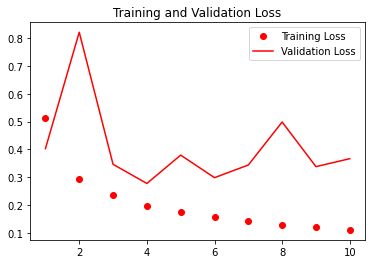

In [7]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b-', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()